# Setup

In [1]:
from MERFISH_Objects.execute_class import *
import shutil
import importlib
# importlib.reload(MERFISH_Objects.execute_class)
import time
from tqdm import trange
import pandas as pd
from collections import Counter
import numpy as np
from Bio import SeqIO

2022-08-23 14:16:47,330 [INFO] WRITING LOG OUTPUT TO /home/fangming/.cellpose/run.log


In [2]:
pth = "/scratch/test_merfish_FX_results"

In [3]:
start = time.time()
metadata_path = '/bigstore/Images2022/Gaby/Zebrafinch/Zebra_B0_2022Jul11/'
dataset = [i for i in metadata_path.split('/') if not i==''][-1]
cword_config = 'merfish_config_zebrafinch'
config = importlib.import_module(cword_config)
parameters = config.parameters
fishdata_path = os.path.join(metadata_path, parameters['fishdata'])
utilities_path = parameters['utilities_path']
bitmap = config.bitmap

In [4]:
for key in parameters:
    if key.endswith('path') or key.endswith('data'):
        print(key, parameters[key])

daemon_path /scratch/test_daemon_FX
utilities_path /scratch/test_merfish_FX
fishdata fishdata_testFX


# Load image and view one position

In [5]:
def plot_image_with_zoom(img, x_window, y_window, vmin_p=0, vmax_p=100, title=''):
    """
    """
    vmin,vmax = np.percentile(img.ravel(),[vmin_p, vmax_p])

    fig, axs = plt.subplots(1, 2, figsize=(10*2,10*1))
    for ax in axs:
        ax.set_title(title)
        g = ax.imshow(img,vmin=vmin,vmax=vmax,cmap='jet')

    ax = axs[0]
    ax.hlines(y_window, xmin=x_window[0], xmax=x_window[1], color='white')
    ax.vlines(x_window, ymin=y_window[0], ymax=y_window[1], color='white')

    ax = axs[1]
    ax.set_xlim(x_window)
    ax.set_ylim(y_window)
    fig.colorbar(g, shrink=0.5, ax=ax)
    plt.show()

In [6]:
nuclei = [i for i in os.listdir(metadata_path) if 'nucstain' in i][-1]
print(nuclei)
hybe1 = [i for i in os.listdir(metadata_path) if 'hybe1_' in i][-1]
print(hybe1)

image_metadata_nuc = Metadata(os.path.join(metadata_path, nuclei))
print(image_metadata_nuc.posnames.shape)
image_metadata = Metadata(os.path.join(metadata_path, hybe1))
print(image_metadata.posnames.shape)

nucstain_26
hybe1_2
(150,)
(150,)


In [7]:
posname = '7-Pos004_003'#image_metadata.posnames[0]
img_nuc = image_metadata_nuc.stkread(Position=posname, Channel='DeepBlue').max(2) # max across z?
img_plyt = image_metadata_nuc.stkread(Position=posname, Channel='FarRed').max(2) # max across z?

zindex = 16
img = image_metadata.stkread(Position=posname, Channel='FarRed',zindex=zindex).max(2)
img2 = img.astype(float).copy()
bkg = gaussian_filter(img2, 3)
img2 = img2-bkg
print(img_nuc.shape, img.shape, img2.shape)

(2048, 2448) (2048, 2448) (2048, 2448)


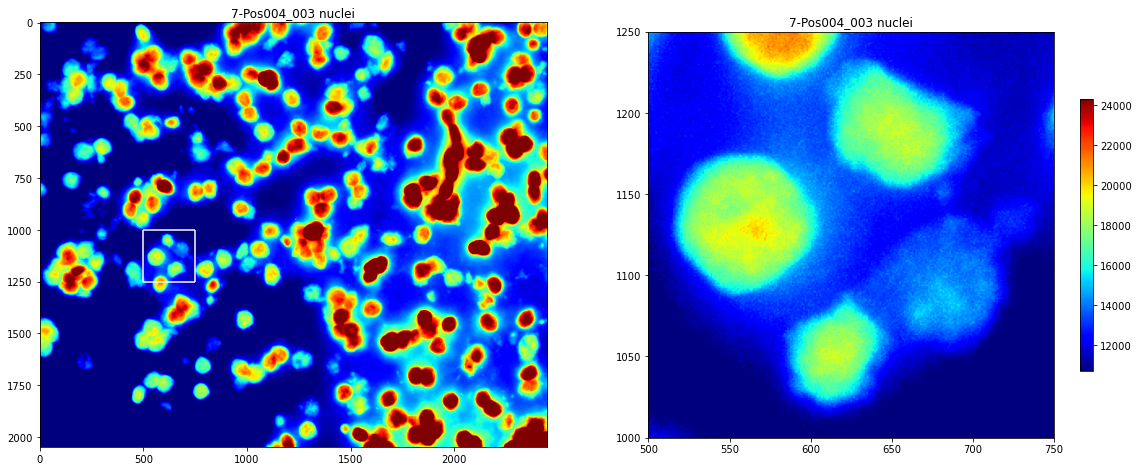

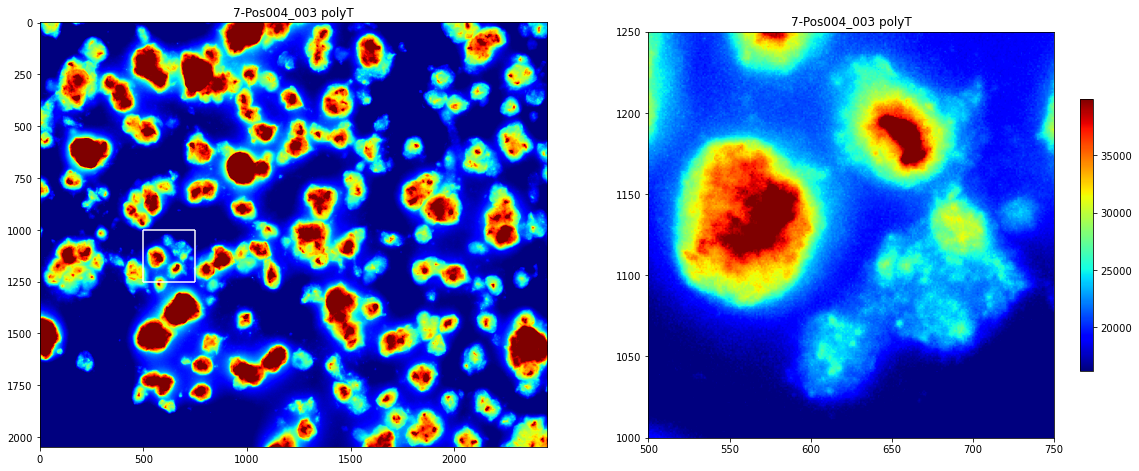

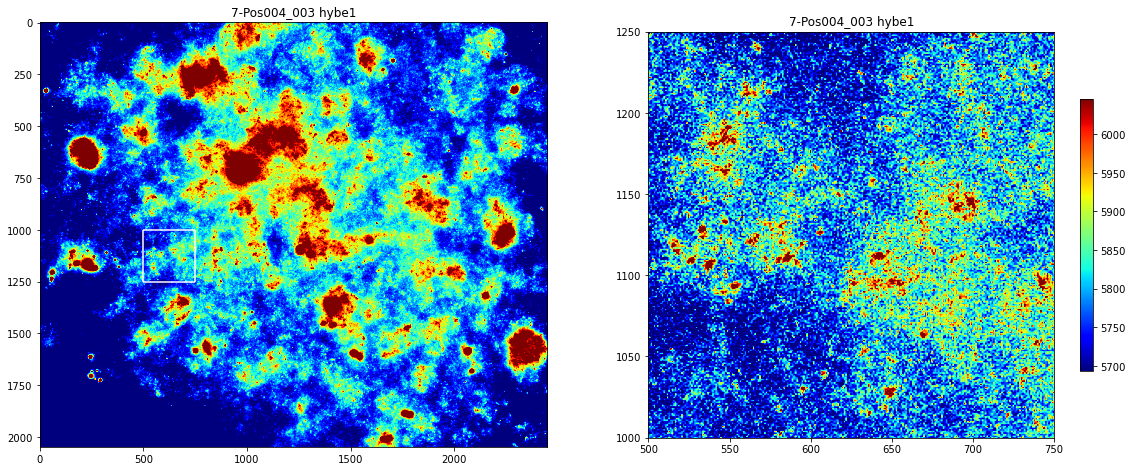

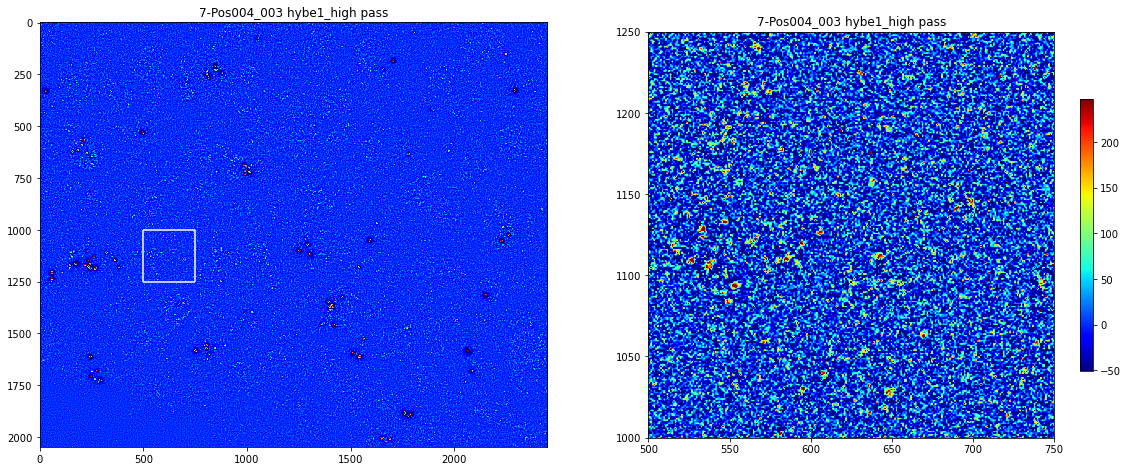

In [8]:
x_window = [500,750]
y_window = [1000,1250]
plot_image_with_zoom(img_nuc,  x_window, y_window, vmin_p=25, vmax_p=95,   title=posname+" nuclei")
plot_image_with_zoom(img_plyt, x_window, y_window, vmin_p=25, vmax_p=95,   title=posname+" polyT")
plot_image_with_zoom(img,      x_window, y_window, vmin_p=25, vmax_p=95,   title=posname+" hybe1")
plot_image_with_zoom(img2,     x_window, y_window, vmin_p=25, vmax_p=99.5, title=posname+" hybe1_high pass")